# **Trabajo final en Python: Análisis de un dataset**

___

## 1. Lectura y exploración inicial del dataset:

    a)Importen las librerías numpy y pandas

In [76]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

    b)Lean el dataset descargado de Kaggle utilizando pandas.

In [77]:
archivo = 'Auto_Sales_data.csv'
data = pd.read_csv(archivo)  # Utiliza pd.read_csv() para cargar los datos desde un archivo CSV

    c)Muestren las primeras y últimas filas del dataset.

In [78]:
primeras = data.head()
ultimas = data.tail()

# Imprime las primeras y las últimas filas
print(f"Primeras filas: {primeras}")
print(f"Últimas 5 filas: {ultimas}")

Primeras filas:    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \


    d)Obtengan información general del dataset, como el número de filas y columnas, y los tipos de datos

In [79]:
info = data.info()   # Muestra info del csv

nfilas, ncolumnas = data.shape
print(f"Número de filas: {nfilas}")
print(f"Número de columnas: {ncolumnas}")

tipos = data.dtypes
print(f"Tipos de datos de cada columna:{tipos}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

___

## 2. Limpieza y preprocesamiento de datos:

    a)Identifiquen y traten o imputen los valores faltantes NaN usando una función personalizada que use la moda/media para remplazarlos. En caso de no haber filas con NaN, todo dato que esté por encima o por debajo de dos desviaciones típicas de la media tendrá que imputarse por la moda/media.

In [80]:
import pandas as pd
import numpy as np

archivo = 'Auto_Sales_data.csv'
df = pd.read_csv(archivo)  # Utiliza pd.read_csv() para cargar los datos desde un archivo CSV

# Función para reemplazar NaN con la moda o la media
def replace_nan(df, column, method='mean'):
    if df[column].isnull().sum() > 0:
        if method == 'mean':
            df[column].fillna(df[column].mean(), inplace=True)
        elif method == 'mode':
            df[column].fillna(df[column].mode()[0], inplace=True)

# Aplicar la función a todas las columnas
for column in df.columns:
    replace_nan(df, column)

# Tratar valores fuera de 2 desviaciones estándar
for column in df.select_dtypes(include=[np.number]).columns:
    mean = df[column].mean()
    std = df[column].std()
    upper_bound = mean + 2*std
    lower_bound = mean - 2*std
    df[column] = np.where((df[column] > upper_bound) | (df[column] < lower_bound), df[column].mean(), df[column])
    
print(df)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0         10107.0             30.0      95.70         2.000000  2871.00   
1         10121.0             34.0      81.35         5.000000  2765.90   
2         10134.0             41.0      94.74         2.000000  3884.34   
3         10145.0             45.0      83.26         6.000000  3746.70   
4         10168.0             36.0      96.66         1.000000  3479.76   
...           ...              ...        ...              ...      ...   
2742      10350.0             20.0     112.22         6.491081  2244.40   
2743      10373.0             29.0     137.19         1.000000  3978.51   
2744      10386.0             43.0     125.99         4.000000  5417.57   
2745      10397.0             34.0      62.24         1.000000  2116.16   
2746      10414.0             47.0      65.52         9.000000  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  \
0     24/02/2018            

    b) Conviertan los tipos de datos de las columnas si es necesario.

In [81]:
df.ORDERDATE = pd.to_datetime(df["ORDERDATE"],dayfirst = True)

    c)Renombren las columnas para facilitar su manipulación.

In [82]:
df.columns = ['numero_del_pedido', 'cantidad_de_pedidos','precio_cada_pedido','numero_linea_pedido','ventas','fecha_pedido','dias_desde_ultimo_pedido','status','linea_producto','precio_venta_sugerido','codigo_producto','nombre_cliente','telefono','direccion_linea1','ciudad','codigo_postal','pais','apellido_contacto','nombre_contacto','tamaño_acuerdo']
print(df.columns)

Index(['numero_del_pedido', 'cantidad_de_pedidos', 'precio_cada_pedido',
       'numero_linea_pedido', 'ventas', 'fecha_pedido',
       'dias_desde_ultimo_pedido', 'status', 'linea_producto',
       'precio_venta_sugerido', 'codigo_producto', 'nombre_cliente',
       'telefono', 'direccion_linea1', 'ciudad', 'codigo_postal', 'pais',
       'apellido_contacto', 'nombre_contacto', 'tamaño_acuerdo'],
      dtype='object')


___

## 3. Análisis exploratorio de datos (EDA):

    a) Calculen estadísticas básicas de las columnas numéricas media, mediana, desviación estándar usando funciones personalizadas que tendréis que crear vosotros

Mirar que columnas tienen datos numéricos y hacer los calculos solo para las columnas donde es útil y tiene sentido

In [83]:
# Eliminar columnas que no se utilizarán y separar datos numericos y no numericos
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['numero_del_pedido', 'numero_linea_pedido'])
df_cat = df.select_dtypes(include = ['object']).drop(columns = ['nombre_cliente', 'telefono', 'direccion_linea1', 'codigo_postal', 'apellido_contacto', 'nombre_contacto', 'codigo_producto'])
print(df_num.columns)
print(df_cat.columns)

Index(['cantidad_de_pedidos', 'precio_cada_pedido', 'ventas',
       'dias_desde_ultimo_pedido', 'precio_venta_sugerido'],
      dtype='object')
Index(['status', 'linea_producto', 'ciudad', 'pais', 'tamaño_acuerdo'], dtype='object')


Crear una función para calcular la media

In [84]:
def media(columna):
    return sum(columna) / len(columna)

Crear una función para calcular la mediana

In [85]:
def mediana(columna):
    columna_ordenada = sorted(columna)
    if len(columna) % 2 == 0:
        mediana = (columna_ordenada[int(len(columna) / 2)] + columna_ordenada[int(len(columna) / 2) - 1]) / 2
    else:
        mediana = columna_ordenada[int(len(columna) / 2)]
    return mediana

Crear una función para calcular la desviación estándar

In [86]:
import math
def desviacion_estandar(columna):
    medias = media(columna)
    squared_diff = [(x - medias)**2 for x in columna]
    variance = sum(squared_diff) / len(columna)
    std_dev = math.sqrt(variance)
    return round(std_dev, 2)

Calcular la media, mediana y desviación estandar de las columnas numericas

In [87]:

display(round(df_num.describe(),2).T)

# Estadísticas descriptivas personalizadas
custom_stats = pd.DataFrame({
    'Media': df_num.apply(media),
    'Mediana': df_num.apply(mediana),
    'Desviación Estándar': df_num.apply(desviacion_estandar),
})

# Redondear a dos decimales
custom_stats = custom_stats.round(2)

# Transponer el DataFrame
custom_stats = custom_stats.T

# Mostrar el resultado
print(custom_stats)


,count,mean,std,min,25%,50%,75%,max
cantidad_de_pedidos,2747.0,34.74,8.88,16.00,27.00,35.00,42.00,54.00
precio_cada_pedido,2747.0,96.93,35.91,26.88,68.74,95.55,120.88,185.13
ventas,2747.0,3330.12,1462.93,482.13,2204.35,3184.80,4180.94,7209.11
dias_desde_ultimo_pedido,2747.0,1753.28,806.37,127.00,1081.50,1757.09,2429.00,3393.00
precio_venta_sugerido,2747.0,96.99,34.88,33.00,68.00,99.00,118.00,173.00


                     cantidad_de_pedidos  precio_cada_pedido   ventas  \
Media                              34.74               96.93  3330.12   
Mediana                            35.00               95.55  3184.80   
Desviación Estándar                 8.88               35.90  1462.67   

                     dias_desde_ultimo_pedido  precio_venta_sugerido  
Media                                 1753.28                  96.99  
Mediana                               1757.09                  99.00  
Desviación Estándar                    806.23                  34.87  


    b) Crear gráficos para visualizar la distribución de los datos, como histogramas y diagramas de caja.

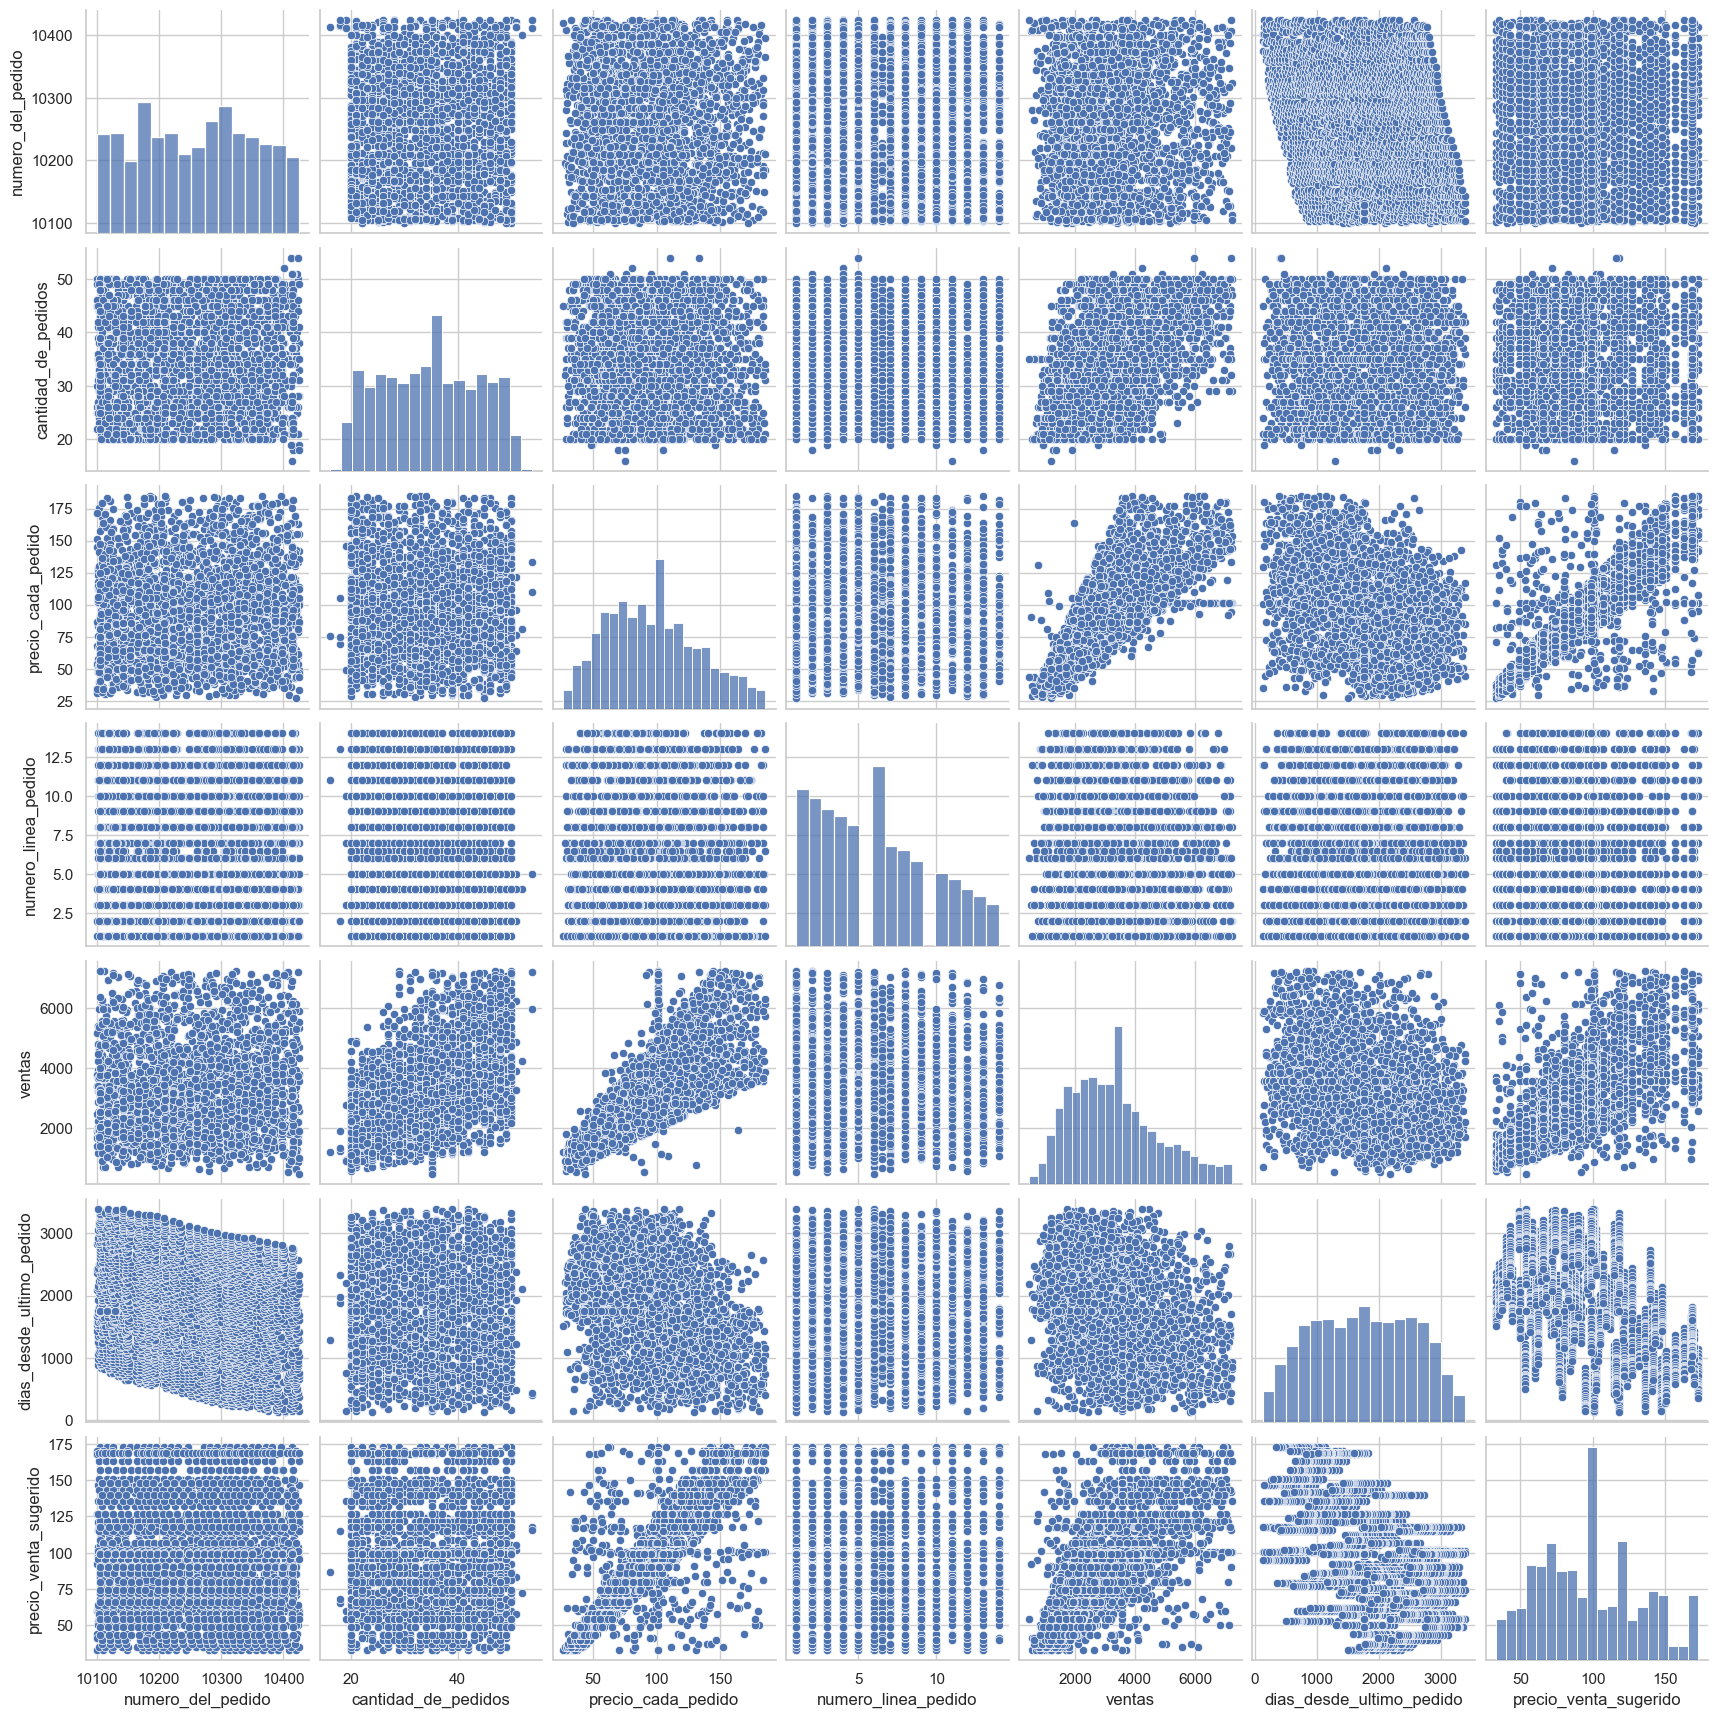

In [88]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.grid()
plt.show()

In [89]:
df_num['fecha_pedido'] = pd.to_datetime(df['fecha_pedido'])
df_num.head()

,cantidad_de_pedidos,precio_cada_pedido,ventas,dias_desde_ultimo_pedido,precio_venta_sugerido,fecha_pedido
0,30.0,95.70,2871.00,828.0,95.0,2018-02-24
1,34.0,81.35,2765.90,757.0,95.0,2018-05-07
2,41.0,94.74,3884.34,703.0,95.0,2018-07-01
3,45.0,83.26,3746.70,649.0,95.0,2018-08-25
4,36.0,96.66,3479.76,586.0,95.0,2018-10-28


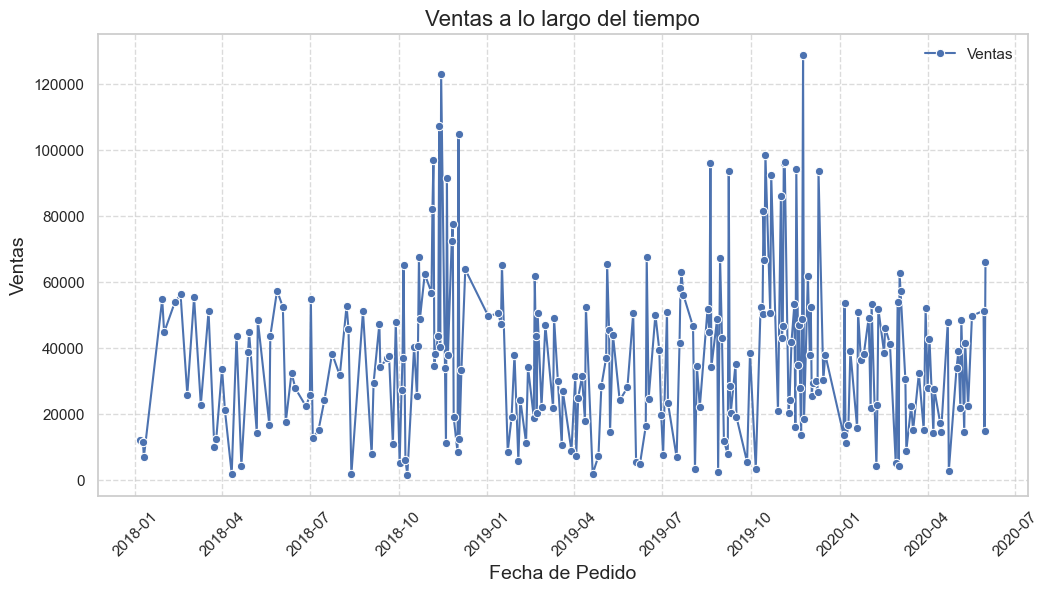

In [90]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_num.groupby('fecha_pedido')['ventas'].sum(), marker='o', color='b', label='Ventas')

# Configuración del título y etiquetas
plt.title('Ventas a lo largo del tiempo', fontsize=16)
plt.xlabel('Fecha de Pedido', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Añadir una leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

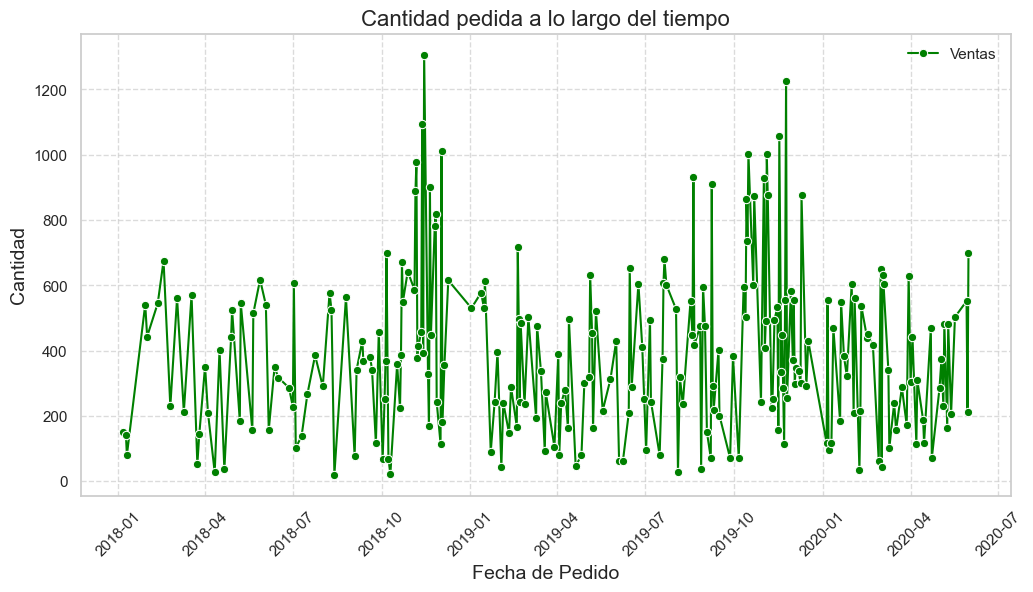

In [91]:
# Configuración del estilo
sns.set(style="whitegrid")

# Crear el gráfico de líneas con color verde
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_num.groupby('fecha_pedido')['cantidad_de_pedidos'].sum(), marker='o', color='green', label='Ventas')

# Configuración del título y etiquetas
plt.title('Cantidad pedida a lo largo del tiempo', fontsize=16)
plt.xlabel('Fecha de Pedido', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Añadir una leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

C:\Users\lsell\AppData\Local\Temp\ipykernel_3392\4292111948.py:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



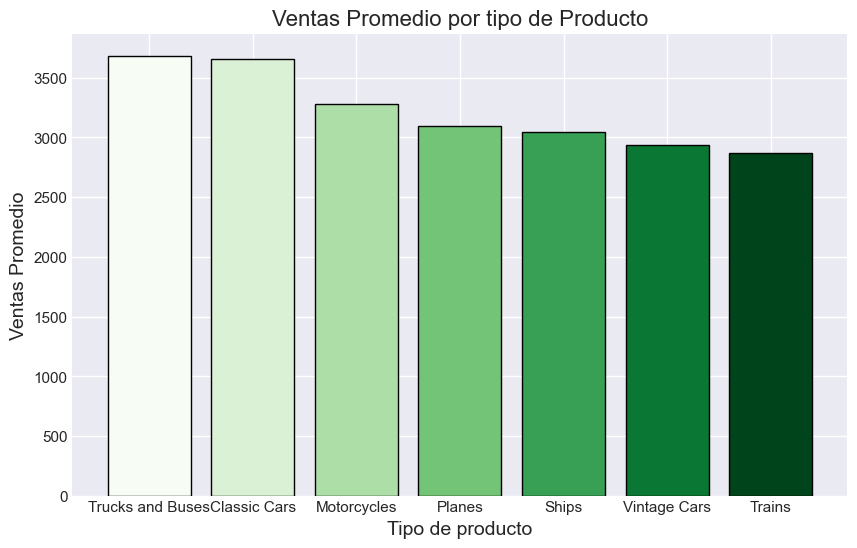

In [92]:
# Calcular la media de las ventas por línea de producto
ventas_promedio = df.groupby('linea_producto')['ventas'].mean().sort_values(ascending=False)

# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bar_plot = ax.bar(ventas_promedio.index, ventas_promedio, color=plt.cm.Greens(np.linspace(0, 1, len(ventas_promedio))), edgecolor='black')

# Añadir etiquetas y título
ax.set_title('Ventas Promedio por tipo de Producto', fontsize=16)
ax.set_xlabel('Tipo de producto', fontsize=14)
ax.set_ylabel('Ventas Promedio', fontsize=14)

# Mostrar el gráfico
plt.show()

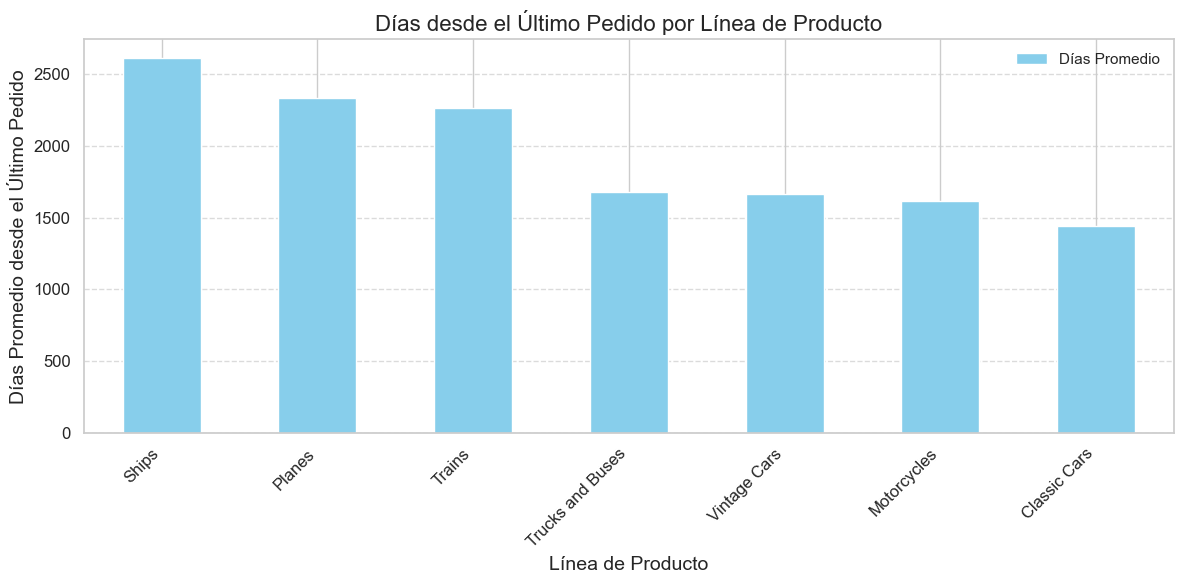

In [93]:
# Configuración del estilo
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura

# Tu código original
df.groupby('linea_producto')['dias_desde_ultimo_pedido'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Configuración del gráfico
plt.title('Días desde el Último Pedido por Línea de Producto', fontsize=16)
plt.xlabel('Línea de Producto', fontsize=14)
plt.ylabel('Días Promedio desde el Último Pedido', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotar las etiquetas del eje x
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la leyenda y ajustar la posición
plt.legend(['Días Promedio'], loc='upper right')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

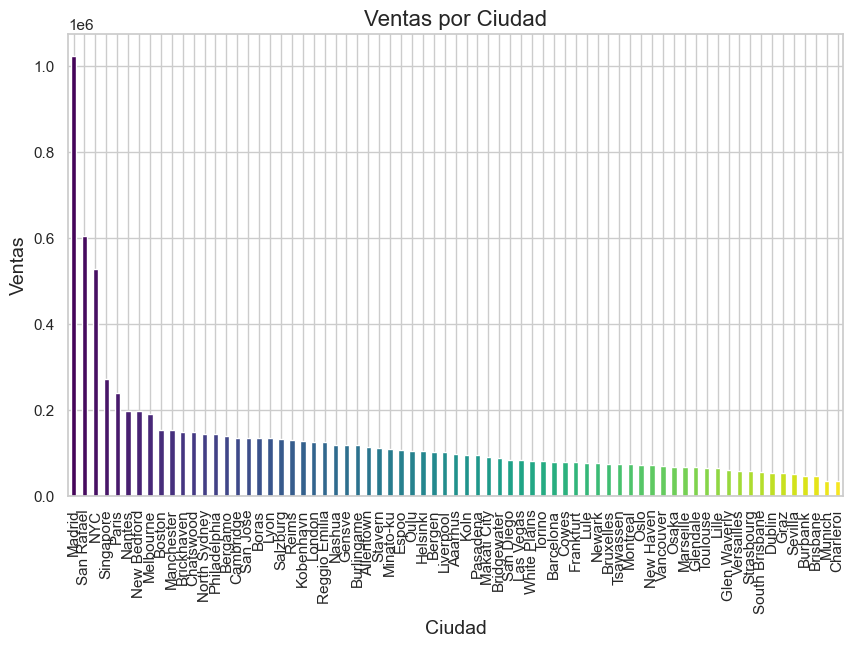

In [94]:
# Agrupar por ciudad y sumar las ventas
ventas_por_ciudad = df.groupby('ciudad')['ventas'].sum().sort_values(ascending=False)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico

# Utilizar un paleta de colores
colores = sns.color_palette("viridis", len(ventas_por_ciudad))

# Crear el gráfico de barras con colores personalizados
ventas_por_ciudad.plot(kind='bar', color=colores)

# Configurar el título y las etiquetas de los ejes
plt.title('Ventas por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=14)
plt.ylabel('Ventas', fontsize=14)

# Mostrar el gráfico
plt.show()

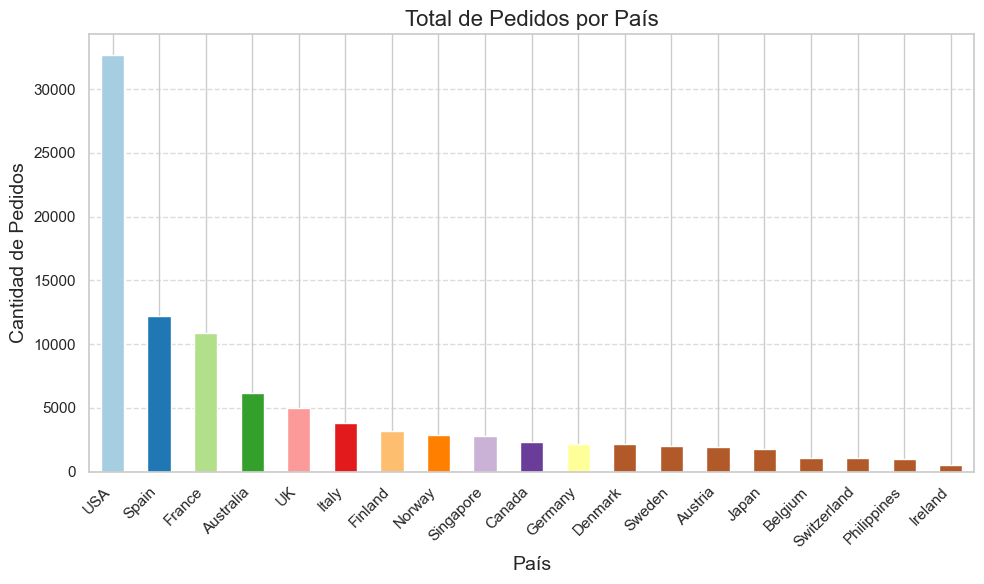

In [95]:
# Agrupar por país y sumar la cantidad de pedidos
df_agrupado = df.groupby('pais')['cantidad_de_pedidos'].sum().sort_values(ascending=False)

# Configuración del gráfico
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
colors = plt.cm.Paired(range(len(df_agrupado)))  # Colores escalados según los valores

# Crear el gráfico de barras
df_agrupado.plot(kind='bar', color=colors)

# Configuración adicional
plt.title('Total de Pedidos por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Cantidad de Pedidos', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de cuadrícula en el eje y

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

In [96]:

# Seleccionar columnas categóricas de interés
grupo_1 = df[['status', 'tamaño_acuerdo']]

# Definir función para análisis univariado de categorías
def Analisis_categoria(cols):
    # Imprimir título y separador
    print("_"*60)
    
    # Definir colores para los gráficos
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    
    # Obtener recuento de cada categoría
    recuento = grupo_1[cols].value_counts()
    
    # Gráfico de barras para la distribución de categorías
    fig = px.bar(recuento, x=recuento.index, y=recuento.values, 
                 title=f'Distribución de {cols}', labels={'x': 'Categoria', 'y': 'Cantidad'},
                 color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    
    # Gráfico de donut para el porcentaje de cada categoría
    percentage = (recuento / recuento.sum()) * 100
    fig = px.pie(values=percentage, names=recuento.index,
                 labels={'names': 'Categoria', 'values': 'Porcentaje'}, hole=0.5,
                 color_discrete_sequence=colors)
    fig.add_annotation(x=0.5, y=0.5, align="center", xref="paper", yref="paper",
                       showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    
    # Imprimir espacio en blanco para separar resultados
    print("       ")

# Iterar sobre las columnas categóricas y realizar análisis univariado
for x in grupo_1:
    Analisis_categoria(x)

____________________________________________________________


       
____________________________________________________________


    c) Identifiquen y analicen las correlaciones entre variables.

Para ver la correlación entre las variables numéricas hay que calcular el coeficiente de relación de Pearson para ver la correlación lineal

In [97]:
corr = df_num.corr(method='pearson')
print(corr)

                          cantidad_de_pedidos  precio_cada_pedido    ventas  \
cantidad_de_pedidos                  1.000000           -0.012736  0.481140   
precio_cada_pedido                  -0.012736            1.000000  0.733277   
ventas                               0.481140            0.733277  1.000000   
dias_desde_ultimo_pedido            -0.003813           -0.340994 -0.277606   
precio_venta_sugerido                0.009498            0.748734  0.585260   

                          dias_desde_ultimo_pedido  precio_venta_sugerido  
cantidad_de_pedidos                      -0.003813               0.009498  
precio_cada_pedido                       -0.340994               0.748734  
ventas                                   -0.277606               0.585260  
dias_desde_ultimo_pedido                  1.000000              -0.440580  
precio_venta_sugerido                    -0.440580               1.000000  


C:\Users\lsell\AppData\Local\Temp\ipykernel_3392\2556785558.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Los números toman valores entre -1 y 1. Si el valor es cercano a 1, significa que hay una correlación positiva fuerte, si es cercano a -1, significa que hay una correlación negativa fuerte y si es cercano a 0, significa que no hay correlación lineal.

Vamos a sustituir los números por cada tipo de correlación para entenderlo mejor. Para ello usamos un blucle for que sustituye los números por palabras.

In [98]:
for i in corr.columns:
    for j in corr.columns:
        if corr[i][j] == 1:
            corr[i][j] = 'PERFECTA (+)'
        elif corr[i][j] == -1:
            corr[i][j] = 'PERFECTA (-)'
        elif corr[i][j] < 1 and corr[i][j] >= 0.5:
            corr[i][j] = 'FUERTE (+)'
        elif corr[i][j] > -1 and corr[i][j] <= -0.5:
            corr[i][j] = 'FUERTE (-)'
        elif corr[i][j] < 0.5 and corr[i][j] >= 0.3:
            corr[i][j] = 'MODERADA (+)'
        elif corr[i][j] > -0.5 and corr[i][j] <= -0.3:
            corr[i][j] = 'MODERADA (-)'
        elif corr[i][j] < 0.3 and corr[i][j] >= 0.1:
            corr[i][j] = 'DEBIL (+)'
        elif corr[i][j] > -0.3 and corr[i][j] <= -0.1:
            corr[i][j] = 'DEBIL (-)'
        else:
            corr[i][j] = 'NULA'

print(corr)

                         cantidad_de_pedidos precio_cada_pedido        ventas  \
cantidad_de_pedidos             PERFECTA (+)               NULA  MODERADA (+)   
precio_cada_pedido                      NULA       PERFECTA (+)    FUERTE (+)   
ventas                          MODERADA (+)         FUERTE (+)  PERFECTA (+)   
dias_desde_ultimo_pedido                NULA       MODERADA (-)     DEBIL (-)   
precio_venta_sugerido                   NULA         FUERTE (+)    FUERTE (+)   

                         dias_desde_ultimo_pedido precio_venta_sugerido  
cantidad_de_pedidos                          NULA                  NULA  
precio_cada_pedido                   MODERADA (-)            FUERTE (+)  
ventas                                  DEBIL (-)            FUERTE (+)  
dias_desde_ultimo_pedido             PERFECTA (+)          MODERADA (-)  
precio_venta_sugerido                MODERADA (-)          PERFECTA (+)  


C:\Users\lsell\AppData\Local\Temp\ipykernel_3392\3578689225.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lsell\AppData\Local\Temp\ipykernel_3392\3578689225.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



La recta de regresión es una línea que busca modelar la relación lineal entre una variable independiente y una variable dependiente.
Probemos a calcular la recta de regresión de dos variables con una correlación lineal fuerte.
Para ello vamos a utilizar la librería numpy y la función polyfit que se utiliza para calcular directamente la pendiente y la ordenada al origen de la recta de regresión.

In [99]:
# Datos de precios Y ventas
PRICEEACH = df['precio_cada_pedido'].values
SALES = df['ventas'].values

Hallamos los valores de m(pendiente) y b(ordenada al origen) para la recta de regression y = mx + b  

In [100]:
pendiente, ordenada_al_origen = np.polyfit(PRICEEACH, SALES, 1)

print(f"Pendiente: {pendiente}")
print(f"Ordenada_al_origen: {ordenada_al_origen}")

Pendiente: 29.873129160515646
Ordenada_al_origen: 434.4920130816187


Visualizar los datos y la recta de regresión para ver que efectivamente existe una correlación precio-ventas.

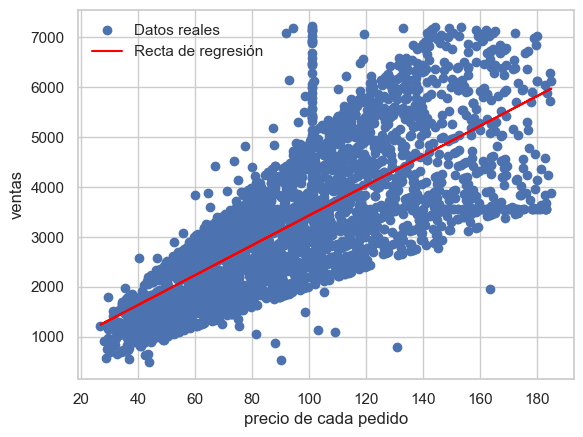

In [101]:

plt.scatter(PRICEEACH, SALES, label='Datos reales')
plt.plot(PRICEEACH, pendiente * PRICEEACH + ordenada_al_origen, color='red', label='Recta de regresión')
plt.xlabel('precio de cada pedido')
plt.ylabel('ventas')
plt.legend()
plt.show()


# 4. Manipulación de datos usando condicionales y bucles:

a) Filtrar el dataset utilizando condiciones específicas.

In [102]:
import pandas as pd

archivo = 'Nuevo_archivo.csv'
data = pd.read_csv(archivo)

#Filtramos las filas donde QUANTITYORDERED >50
condicion_filtrado = data['QUANTITYORDERED'] > 50

# Aplicar el filtrado utilizando la función loc
datos_filtrados = data.loc[condicion_filtrado]
print(datos_filtrados)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
23          10417               66     113.88                2   7516.08   
96          10403               66     180.10                9  11886.60   
97          10417               56     164.61                4   9218.16   
121         10400               64     150.96                9   9661.44   
244         10341               55     147.61                8   8118.55   
248         10403               66     131.04                6   8648.64   
374         10412               54     110.21                5   5951.34   
395         10341               55      75.20                7   4136.00   
399         10405               97      93.28                5   9048.16   
426         10424               54     133.00                5   7182.00   
452         10406               61     137.29                3   8374.69   
477         10422               51      95.55                2   4873.05   
524         

b) Crear nuevas columnas aplicando funciones o cálculos basados en
valores de otras columnas.

In [103]:
import pandas as pd

# Cargamos los datos
df = pd.read_csv('Auto_Sales_data.csv')

# 1. Margen de Ganancia
df['Margen_Ganancia'] = (df['SALES'] - (df['QUANTITYORDERED'] * df['PRICEEACH'])) / df['SALES']

# 2. Categoría de Ventas
def categorizar_ventas(sales):
    if sales < 5000:
        return 'Pequeña'
    elif sales < 20000:
        return 'Mediana'
    else:
        return 'Grande'

df['Categoria_Ventas'] = df['SALES'].apply(categorizar_ventas)

# 3. Tiempo desde la Última Compra
def clasificar_tiempo(dias):
    if dias <= 30:
        return 'Reciente'
    elif dias <= 90:
        return 'Moderado'
    else:
        return 'Distante'
    
df['Clasificacion_Compra'] = df['DAYS_SINCE_LASTORDER'].apply(clasificar_tiempo)

# 4. Prioridad de Cliente (Ejemplo simple)
# Esto podría ser más complejo si acumulamos datos por cliente
df['Prioridad_Cliente'] = df['SALES'].apply(lambda x: 'Alta' if x > 10000 else ('Media' if x > 5000 else 'Baja'))

# 5. Estado de Pedido
def estado_pedido(status):
    if status in ['Shipped', 'Resolved']:
        return 'Completado'
    elif status in ['In Process', 'On Hold']:
        return 'En Proceso'
    else:
        return 'Retrasado'

df['Estado_Pedido'] = df['STATUS'].apply(estado_pedido)

# Guardamos los cambios
df.to_csv('Auto_Sales_data_modificado.csv', index=False)

c) Utilizar bucles para iterar sobre filas o columnas y realizar cálculos.

In [104]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('Auto_Sales_data_modificado.csv')

# Iterar sobre las filas
for index, row in df.iterrows():  #La funcion df.iterrows se utiliza para iterar sobre las filas de un csv
    # Realizar cálculos con los datos de cada fila
    df.at[index, 'NuevaColumna'] = row['QUANTITYORDERED'] * row['PRICEEACH'] #row representa una fila del csv

# Iterar sobre las columnas
for column in df.columns:
    # Realizar cálculos con los datos de cada columna
    if pd.api.types.is_numeric_dtype(df[column]):   #La funcion pd.api.types.is_numeric_dtype se utiliza para verificar si un tipo de datos es numérico
        print(f'Promedio de {column}: {df[column].mean()}')

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv('Auto_Sales_data_modificado_resultado.csv', index=False)

 #La funcion index=False se ultiliza para uardar el DataFrame en un archivo CSV sin incluir la columna de índices

Promedio de ORDERNUMBER: 10259.761558063341
Promedio de QUANTITYORDERED: 35.10302147797597
Promedio de PRICEEACH: 101.09895158354568
Promedio de ORDERLINENUMBER: 6.4910811794685115
Promedio de SALES: 3553.0475828176195
Promedio de DAYS_SINCE_LASTORDER: 1757.085911903895
Promedio de MSRP: 100.69166363305425
Promedio de Margen_Ganancia: -2.1749948591073273e-09
Promedio de NuevaColumna: 3553.047604659629


# 5. Manejo de excepciones:

a) Utilizar bloques try-except para manejar errores o excepciones al leer
o procesar el dataset.

In [105]:
import pandas as pd 
class InvalidDataError(Exception):
    pass

def process_dataset(df):
    df['columna']=df['columna'].apply(lambda x: x.lower())
    return df
#Bloque try-except
try:
    df=pd.read_csv('Auto_Sales_data.csv')
    #Comprobamos si faltan columnas
    columnas_requeridas=['numero_del_pedido', 'cantidad_de_pedidos','precio_cada_pedido','numero_linea_pedido','ventas','fecha_pedido','dias_desde_ultimo_pedido','status','linea_producto','precio_venta_sugerido','codigo_producto','nombre_cliente','telefono','direccion_linea1','ciudad','codigo_postal','pais','apellido_contacto','nombre_contacto','tamaño_acuerdo']
    columnas_q_faltan=[col for col in columnas_requeridas if col not in df.columns]
    if columnas_q_faltan:
        raise InvalidDataError(f"Faltan las siguientes columnas requeridas : ",{', '.join(columnas_q_faltan)})
    
    df_procesado=process_dataset(df)
#Varias excepciones
except pd.errors.EmptyDataError:
    print("El archivo CSV está vacío.")
except pd.errors.ParserError:
    print("Hubo un error al analizar el CSV")
except FileNotFoundError:
    print("No se encontró el archivo CSV.")
except InvalidDataError as e:
    print(e)
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")


('Faltan las siguientes columnas requeridas : ', {'numero_del_pedido, cantidad_de_pedidos, precio_cada_pedido, numero_linea_pedido, ventas, fecha_pedido, dias_desde_ultimo_pedido, status, linea_producto, precio_venta_sugerido, codigo_producto, nombre_cliente, telefono, direccion_linea1, ciudad, codigo_postal, pais, apellido_contacto, nombre_contacto, tamaño_acuerdo'})


b) Crear excepciones personalizadas para manejar situaciones
específicas del análisis.